#Annualizing Return

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf

In [ ]:
yf.pdr_override()

In [ ]:
from pandas_datareader import data as wb

In [ ]:
tickers= 'AAPL'
apple_price = wb.DataReader(tickers,start=2015-1-1)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [ ]:
apple_price.head()

Date
1980-12-12    0.099722
1980-12-15    0.094519
1980-12-16    0.087582
1980-12-17    0.089749
1980-12-18    0.092351
Name: Adj Close, dtype: float64

In [ ]:
apple_price.tail()

Date
2023-02-16    153.710007
2023-02-17    152.550003
2023-02-21    148.479996
2023-02-22    148.910004
2023-02-23    147.759995
Name: Adj Close, dtype: float64

In [ ]:
#Calculate the Total Return
total_return = (apple_price[-1]-apple_price[0]/apple_price[0])
print(total_return)

146.75999450683594


In [ ]:
#Calculate the annualized returns over months
annualized_return = ((1+total_return)**(12/38))-1
print(annualized_return)

3.8430975969377936


In [ ]:
#Select three year period
apple_price = apple_price.loc['2020-01-01':'2022-12-31']
apple_price.tail(3)

Date
2022-12-28    125.847855
2022-12-29    129.412415
2022-12-30    129.731918
Name: Adj Close, dtype: float64

In [ ]:
#Calculat Annualized returns over 3 years
annualized_return = ((1+ total_return)**(1/3))-1
print(annualized_return)

4.286711631894479


#Risk Adjusted Return

In [ ]:
apple_return = apple_price.pct_change()

In [ ]:
#Annualized standard daviation
annualized_vol= apple_return.std()*np.sqrt(250)
print(annualized_vol)

0.3678649354211323


In [ ]:
#Define the risk free rate
risk_free =0.0395

In [ ]:
#Calculating Sharpe Ratio
Sharpe_ratio =(annualized_return- risk_free)/annualized_vol
print(Sharpe_ratio)

11.545573450843488


#Non- normal Distribution of Return

In [ ]:
#Calculating Skewness and kurtosis
apple_returns = apple_price.pct_change()
apple_return.head(3)

Date
2020-01-02         NaN
2020-01-03   -0.009722
2020-01-06    0.007968
Name: Adj Close, dtype: float64

In [ ]:
apple_returns.tail(3)

Date
2022-12-28   -0.030685
2022-12-29    0.028324
2022-12-30    0.002469
Name: Adj Close, dtype: float64

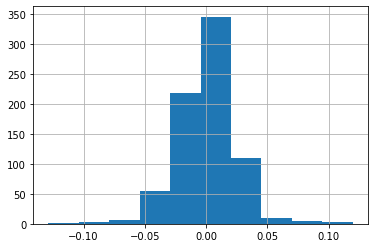

In [ ]:
apple_returns.hist()

In [ ]:
#Calculating skewness and Kurtosis
print("mean : ", apple_returns.mean())
print("vol : ", apple_returns.std())
print("skew : ", apple_returns.skew())
print("kurt : ", apple_returns.kurtosis())

mean :  0.0010238515523800402
vol :  0.023265821344830604
skew :  0.09503705528910188
kurt :  4.0401029502672205


In [ ]:
#Alternative measures of risk
#Sortino Ratio -- useful for measuring only downside volatility

rfr= 0.0395
target= rfr

#calculate the daily returns from price data
apple_returns =pd.DataFrame(apple_price.pct_change())
#Select the negative returns only
negative_returns = apple_returns.loc[apple_returns['Adj Close']< target]

#Calculate expected return and std of downside returns
expected_returns =apple_returns['Adj Close'].mean()
down_stdv= negative_returns.std()

In [ ]:
from yfinance.multi import download
#Calculate the sortino Ratio
sortino_ratio = (expected_returns - target)/down_stdv
print(sortino_ratio)

Adj Close   -1.91041
dtype: float64


#Maximum Daily Draw-down in python

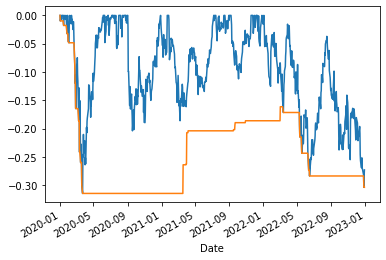

In [ ]:
#Calculate the maximum value of returns using rolling().max()
roll_max = apple_price.rolling(min_periods=1,window=250).max()

#calculate daily draw-down from rolling max
daily_drawdown= apple_price/roll_max-1.0

#Calculate maximum daily draw_down
max_daily_drawdown = daily_drawdown.rolling(min_periods=1,window=250).min()

#plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()
plt.show()